In [1]:
%pip install visualkeras

import tensorflow as tf
print("TensorFlow version:", tf.__version__)
import numpy as np                   # advanced math library
import matplotlib.pyplot as plt      # MATLAB like plotting routines
import random                        # for generating random numbers

from keras.datasets import mnist     # MNIST dataset is included in Keras
from keras.models import Sequential  # Model type to be used

from keras.layers.core import Dense, Dropout, Activation # Types of layers to be used in our model
from keras.utils import np_utils     


                    # NumPy related tools


Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 992 kB 7.5 MB/s 
TensorFlow version: 2.9.2


In [2]:
import pandas as pd
DATA = pd.read_csv('ALL_DATA4.csv')

In [3]:
DATA

,X_acc,Y_acc,Z_acc,X_gyro,Y_gyro,Z_gyro,Label
0,1.33,1.33,6.36,0.03,0.05,0.07,Normal
1,12.02,15.44,7.53,0.20,0.24,0.14,Normal
2,2.76,2.31,8.32,0.09,0.06,0.06,Normal
3,11.83,7.29,11.63,0.28,0.12,0.13,Normal
4,7.59,11.32,13.50,0.42,0.37,0.07,Normal
...,...,...,...,...,...,...,...
5995,7.66,7.14,15.27,0.53,0.59,0.13,Accident
5996,10.20,7.90,10.72,0.95,0.35,1.97,Accident
5997,14.02,18.47,23.38,0.87,2.11,1.31,Accident
5998,11.72,9.72,73.52,0.80,1.55,1.43,Accident


In [4]:
from sklearn.model_selection import train_test_split
import numpy as np

In [5]:
X = np.array([[DATA.X_acc[i],DATA.Y_acc[i],DATA.Z_acc[i],DATA.X_gyro[i],DATA.Y_gyro[i],DATA.Z_gyro[i]] for i in range(len(DATA.Z_gyro))])

In [10]:
len(X)

6000

In [31]:
y = []
for i in DATA.Label:
  if(i == 'Normal'):
    y.append(0)
  elif(i == 'Rash'):
    y.append(1)
  elif(i == 'Accident'):
    y.append(2)


In [32]:
X_train, X_test, y_train, y_test = train_test_split( 
    X, y, test_size=0.33, random_state=42)


nb_classes = 3 # number of unique digits

Y_train = np_utils.to_categorical(y_train, nb_classes) 
Y_test = np_utils.to_categorical(y_test, nb_classes)
Y_train

array([[0., 1., 0.],
       [1., 0., 0.],
       [0., 1., 0.],
       ...,
       [0., 0., 1.],
       [0., 0., 1.],
       [1., 0., 0.]], dtype=float32)

Y_train = np_utils.to_categorical(y_train, nb_classes)
Y_test = np_utils.to_categorical(y_test, nb_classes)


In [33]:
y_train[0]

1

In [42]:
model = Sequential()
model.add(tf.keras.layers.InputLayer(input_shape=(6,)))
model.add(Dense(128, input_shape=(6,)))
model.add(Activation('relu'))
model.add(Dropout(0.2))
model.add(Dense(128))
model.add(Activation('relu'))
model.add(Dropout(0.2))
model.add(Dense(3))
model.add(Activation('softmax'))

In [43]:
model.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_6 (Dense)             (None, 128)               896       
                                                                 
 activation_6 (Activation)   (None, 128)               0         
                                                                 
 dropout_4 (Dropout)         (None, 128)               0         
                                                                 
 dense_7 (Dense)             (None, 128)               16512     
                                                                 
 activation_7 (Activation)   (None, 128)               0         
                                                                 
 dropout_5 (Dropout)         (None, 128)               0         
                                                                 
 dense_8 (Dense)             (None, 3)                

In [44]:
mod = model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

In [45]:
hist = model.fit(X_train, Y_train, epochs=200,
          batch_size = 25,
          verbose=1,validation_split=0.1)

Epoch 1/200
145/145 [==============================] - 1s 4ms/step - loss: 1.1221 - accuracy: 0.4704 - val_loss: 0.8819 - val_accuracy: 0.6144
Epoch 2/200
145/145 [==============================] - 0s 3ms/step - loss: 0.8181 - accuracy: 0.6202 - val_loss: 0.6288 - val_accuracy: 0.7214
Epoch 3/200
145/145 [==============================] - 0s 3ms/step - loss: 0.6051 - accuracy: 0.7286 - val_loss: 0.4795 - val_accuracy: 0.8184
Epoch 4/200
145/145 [==============================] - 0s 3ms/step - loss: 0.5016 - accuracy: 0.7852 - val_loss: 0.4461 - val_accuracy: 0.8358
Epoch 5/200
145/145 [==============================] - 0s 3ms/step - loss: 0.4485 - accuracy: 0.8154 - val_loss: 0.4782 - val_accuracy: 0.8134
Epoch 6/200
145/145 [==============================] - 0s 3ms/step - loss: 0.4261 - accuracy: 0.8187 - val_loss: 0.4001 - val_accuracy: 0.8582
Epoch 7/200
145/145 [==============================] - 0s 3ms/step - loss: 0.4018 - accuracy: 0.8389 - val_loss: 0.3694 - val_accuracy: 0.8657

In [46]:
score = model.evaluate(X_test, Y_test)
print('Test score:', score[0])
print('Test accuracy:', score[1])

62/62 [==============================] - 0s 2ms/step - loss: 0.1031 - accuracy: 0.9667
Test score: 0.10310409218072891
Test accuracy: 0.9666666388511658


In [47]:
# The predict_classes function outputs the highest probability class
# according to the trained classifier for each input example.
predicted_classes = model.predict(X_test)

# Check which items we got right /

62/62 [==============================] - 0s 2ms/step


In [48]:
hist.history.keys()

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])

In [49]:
loss = hist.history['loss']
acc = hist.history['accuracy']
val_loss = hist.history['val_loss']
val_acc = hist.history['val_accuracy']

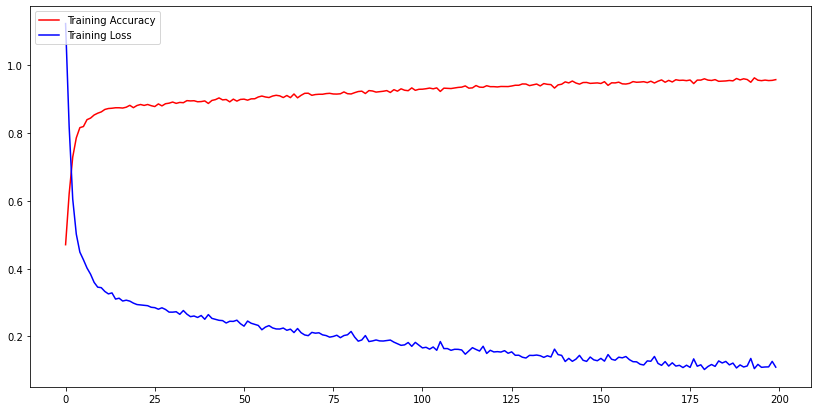

In [50]:
epochs = range(len(acc))
fig = plt.figure(figsize = (14,7))
plt.plot(epochs, acc, 'r', label = 'Training Accuracy')
plt.plot(epochs, loss, 'b', label = 'Training Loss')
plt.legend(loc = 'upper left')
plt.show()

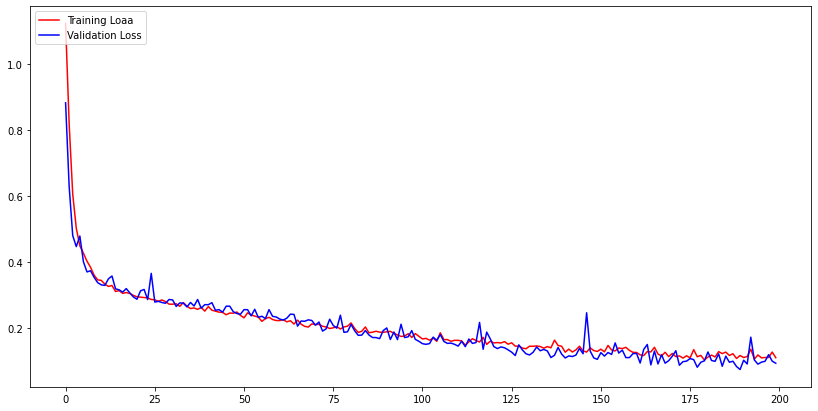

In [51]:
epochs = range(len(acc))
fig = plt.figure(figsize = (14,7))
plt.plot(epochs, loss, 'r', label = 'Training Loaa')
plt.plot(epochs, val_loss, 'b', label = 'Validation Loss')
plt.legend(loc = 'upper left')
plt.show()

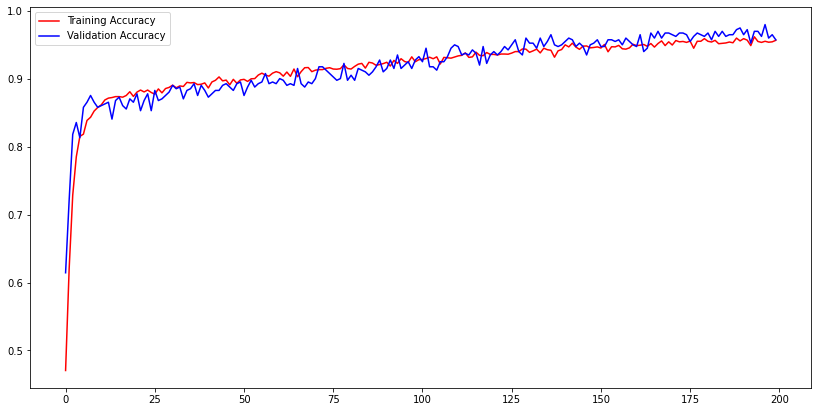

In [52]:
epochs = range(len(acc))
fig = plt.figure(figsize = (14,7))
plt.plot(epochs, acc, 'r', label = 'Training Accuracy')
plt.plot(epochs, val_acc, 'b', label = 'Validation Accuracy')
plt.legend(loc = 'upper left')
plt.show()

In [53]:
import visualkeras
from PIL import ImageFont

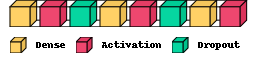

In [54]:
visualkeras.layered_view(model, legend=True)

In [55]:
%pip install ann_visualizer
%pip install graphviz

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
  Created wheel for ann-visualizer: filename=ann_visualizer-2.5-py3-none-any.whl size=4168 sha256=df98cf7804509e8802ebde57b2fb89c93d06c142b91809ef72b5d479d7825fa7
  Stored in directory: /root/.cache/pip/wheels/4b/ef/77/9b8c4ae2f9a11de19957b80bc5c684accd99114bb8dc6b374c
Successfully built ann-visualizer
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [56]:
from ann_visualizer.visualize import ann_viz
ann_viz(model, view=True, filename="cconstruct_model", title="CNN — Model 1 — Simple Architecture")

In [57]:
y_test

[0,
 1,
 0,
 1,
 2,
 0,
 0,
 0,
 0,
 0,
 2,
 1,
 0,
 0,
 1,
 1,
 1,
 2,
 0,
 0,
 0,
 2,
 1,
 1,
 2,
 2,
 0,
 2,
 1,
 1,
 2,
 2,
 2,
 0,
 1,
 0,
 1,
 1,
 2,
 1,
 1,
 0,
 0,
 1,
 2,
 1,
 2,
 1,
 0,
 0,
 0,
 0,
 0,
 1,
 1,
 2,
 1,
 1,
 0,
 2,
 2,
 1,
 2,
 2,
 0,
 1,
 1,
 1,
 0,
 0,
 1,
 2,
 1,
 1,
 2,
 0,
 0,
 0,
 1,
 0,
 2,
 2,
 2,
 0,
 0,
 2,
 0,
 1,
 1,
 1,
 1,
 1,
 2,
 0,
 0,
 2,
 0,
 0,
 0,
 0,
 1,
 0,
 2,
 1,
 0,
 2,
 1,
 1,
 0,
 1,
 1,
 2,
 1,
 1,
 0,
 1,
 0,
 0,
 0,
 0,
 1,
 0,
 1,
 1,
 1,
 2,
 1,
 0,
 2,
 0,
 2,
 2,
 1,
 2,
 0,
 1,
 1,
 0,
 0,
 0,
 1,
 0,
 1,
 2,
 0,
 0,
 1,
 0,
 0,
 2,
 1,
 2,
 0,
 0,
 2,
 1,
 0,
 2,
 0,
 0,
 1,
 0,
 0,
 1,
 2,
 2,
 0,
 0,
 1,
 1,
 0,
 0,
 0,
 1,
 2,
 2,
 2,
 2,
 1,
 2,
 0,
 2,
 2,
 1,
 2,
 1,
 1,
 1,
 1,
 0,
 0,
 1,
 1,
 2,
 1,
 0,
 2,
 2,
 2,
 0,
 1,
 2,
 1,
 2,
 1,
 2,
 2,
 0,
 1,
 0,
 2,
 0,
 0,
 1,
 1,
 1,
 1,
 2,
 2,
 1,
 2,
 0,
 2,
 1,
 1,
 1,
 0,
 1,
 1,
 0,
 0,
 1,
 1,
 1,
 0,
 2,
 0,
 1,
 1,
 2,
 2,
 0,
 1,
 0,
 2,
 2,
 0,
 1,
 1,
 1,


In [58]:
predicted = [np.argmax(i) for i in predicted_classes]

In [59]:
len(predicted) == len(y_test)

True

In [60]:
normal = [True if predicted[i] == 0 and predicted[i]==y_test[i] else False for i in range(len(predicted))]

In [61]:
normal_true = [i for i in normal if i == True]

In [62]:
normal_false = [i for i in normal if i == False]

In [63]:
len(normal) == len(normal_true)+len(normal_false)
len(normal)

1980

In [64]:
rash = [True if predicted[i] == 1 and predicted[i]==y_test[i] else False for i in range(len(predicted))]

In [65]:
rash_true = [i for i in rash if i == True]
rash_false = [i for i in rash if i == False]

In [66]:
data = {'Normal_True':len(normal_true),
        'Normal_False':len(normal_false),
        'Rash_True':len(rash_true),
        'Rash_False':len(rash_false)}

In [67]:
fig = plt.figure(figsize = (10, 5))

<Figure size 720x360 with 0 Axes>

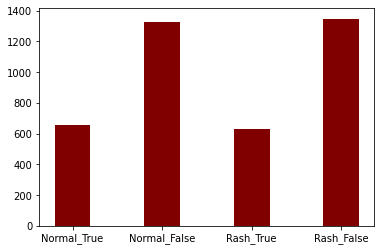

In [68]:
plt.bar(list(data.keys()), list(data.values()), color ='maroon',
        width = 0.4)
plt.show()

In [69]:
a = [True if predicted[i] == y_test[i] else False for i in range(len(predicted))]

In [70]:
true = [i for i in a if i == True]
false = [i for i in a if i == False]

In [71]:
len(true)

1914

In [72]:
len(false)

66

In [76]:
Normal_True = 0
Normal_False = 0
Rash_True = 0
Rash_False = 0
Accident_True = 0
Accident_False = 0
for i in range(len(predicted)):
  if(predicted[i] == 0 and predicted[i] == y_test[i]):
    Normal_True += 1
  elif(predicted[i] == 0 and predicted[i] != y_test[i]):
    Normal_False += 1
  elif(predicted[i] == 1 and predicted[i] == y_test[i]):
    Rash_True += 1
  elif(predicted[i] == 1 and predicted[i] != y_test[i]):
    Rash_False +=1
  elif(predicted[i] == 2 and predicted[i] == y_test[i]):
    Accident_True += 1
  elif(predicted[i] == 2 and predicted[i] != y_test[i]):
    Accident_False +=1


In [77]:
data = {'Normal_False':Normal_False,
    
        'Normal_True':Normal_True,
        
        'Rash_True':Rash_True,
        'Rash_False':Rash_False,
        'Accident_True':Accident_True,
        'Accident_False':Accident_False}

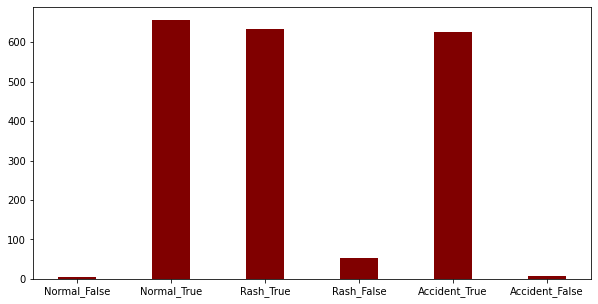

In [78]:
fig = plt.figure(figsize = (10, 5))
plt.bar(list(data.keys()), list(data.values()), color ='maroon',
        width = 0.4)
plt.show()